# ------------------------------> Capstone Project - MIT <------------------------------

# Problem Statement :

# Tasks To Be Performed:

* Perform detailed EDA to obtain actionable insights for various features.
* Perform Feature engineering and feature selection to reduce the noise from the data and prepare the data for data modeling.
* Create a classification model using machine learning algorithms such as logistic regression, decision tree, random forest, etc.
* Choose the best performing model, and optimize the efficiency of the model using hyperparameter tuning.

In [1]:
# Impoting the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

/Users/jagannathprasad/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the test data into the data frame
df_test = pd.read_csv("test.csv",sep=";")

In [3]:
#Loading the train data into the data frame
df_train = pd.read_csv("train.csv",sep=";")

# 1. Perform detailed EDA to obtain actionable insights for various features.

In [4]:
#obseving the data of both train and test receptively 
df_test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [5]:
df_test.tail()

age            job  marital  education default  balance housing loan  \
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no

In [6]:
df_train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [7]:
df_train.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [8]:
#Lets rename the y colunm to deposits as per the data information
df_test.rename(columns ={'y' : 'deposit'}, inplace = True)

In [9]:
df_train.rename(columns ={'y' : 'deposit'}, inplace = True)

In [10]:
df_test.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  cellular   19   oct        79         1     -1         0  unknown      no  
1  cellular   11   may       220         1    339         4  failure      no  
2  cellular   16   apr       185         1    330         1  failure      no  
3   unknown    3   jun       199         4     -1         0  unknown      no  
4   unknown    5   may       226         1     -1         0  unknown      no

In [11]:
df_train.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [12]:
# Checking for null values 
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [13]:
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
# Checking for duplicate values
df_test.duplicated().sum()

0

In [15]:
df_train.duplicated().sum()

0

# Observation :

* This data set doesn’t have any null values nor any duplicated values. 

In [16]:
# Checking the info of data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [18]:
# checking for shape of data
df_train.shape

(45211, 17)

In [19]:
df_test.shape

(4521, 17)

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

<AxesSubplot:>

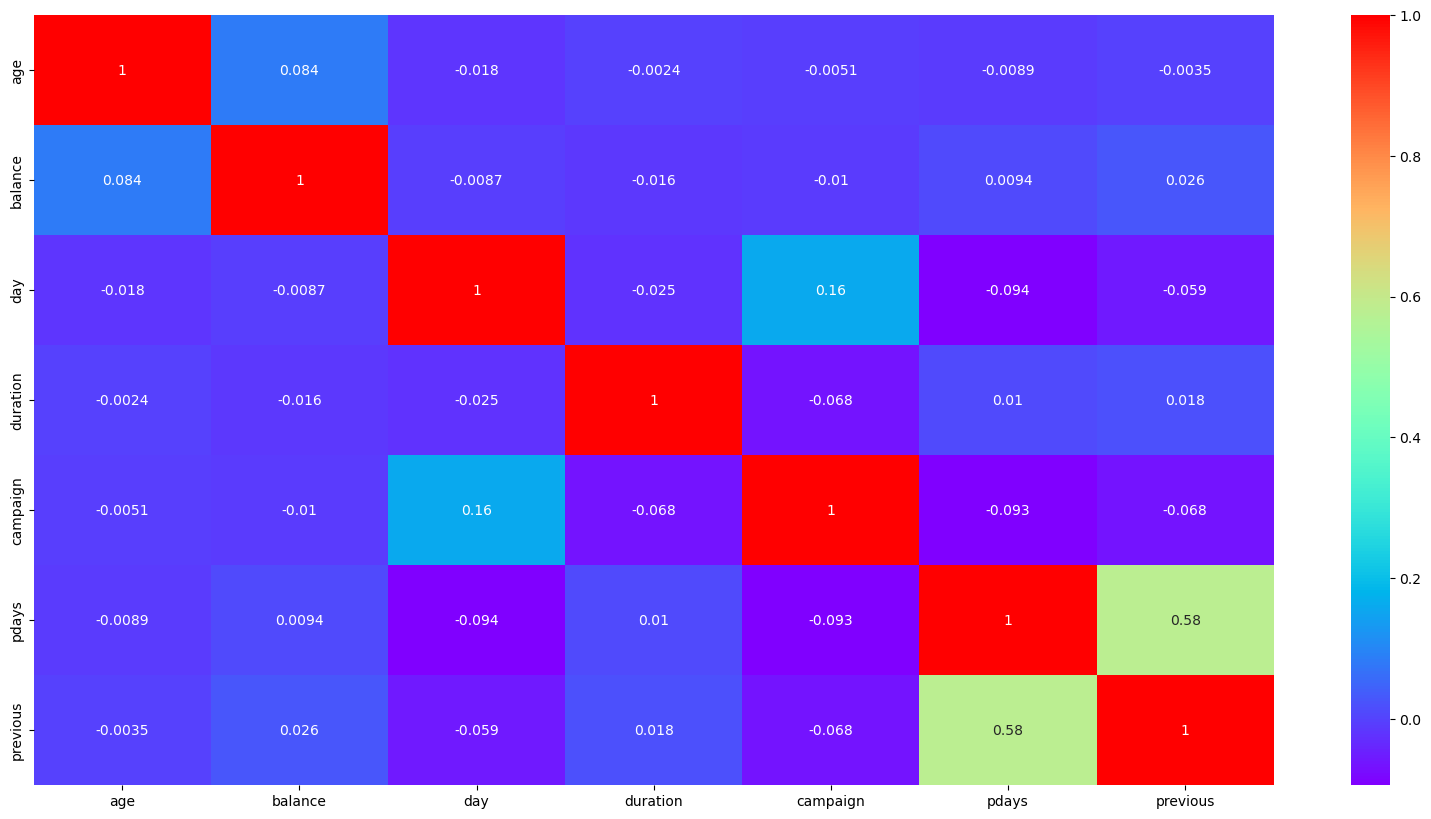

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df_test.corr(),annot=True,cmap='rainbow')

In [22]:
# Checking the statistical information of the data
df_train.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [23]:
df_test.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       4521.0    41.170095    10.576211    19.0   33.0   39.0    49.0   
balance   4521.0  1422.657819  3009.638142 -3313.0   69.0  444.0  1480.0   
day       4521.0    15.915284     8.247667     1.0    9.0   16.0    21.0   
duration  4521.0   263.961292   259.856633     4.0  104.0  185.0   329.0   
campaign  4521.0     2.793630     3.109807     1.0    1.0    2.0     3.0   
pdays     4521.0    39.766645   100.121124    -1.0   -1.0   -1.0    -1.0   
previous  4521.0     0.542579     1.693562     0.0    0.0    0.0     0.0   

              max  
age          87.0  
balance   71188.0  
day          31.0  
duration   3025.0  
campaign     50.0  
pdays       871.0  
previous     25.0

In [24]:
# Checking for unique values
df_train.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

# As we have to predict weather the an Individual has Subscribe to the deposit, lets find the percentage of people who have subscribe and who haven`t respectively in the train data.

In [25]:
# Checking the number of people who have deposited
df_train["deposit"].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [26]:
#Creating a data frame for people who have deposited amount
df_deposit_yes = df_train[df_train["deposit"] == "yes"]
df_deposit_yes.head()

age         job  marital  education default  balance housing loan  \
83    59      admin.  married  secondary      no     2343     yes   no   
86    56      admin.  married  secondary      no       45      no   no   
87    41  technician  married  secondary      no     1270     yes   no   
129   55    services  married  secondary      no     2476     yes   no   
168   54      admin.  married   tertiary      no      184      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome deposit  
83   unknown    5   may      1042         1     -1         0  unknown     yes  
86   unknown    5   may      1467         1     -1         0  unknown     yes  
87   unknown    5   may      1389         1     -1         0  unknown     yes  
129  unknown    5   may       579         1     -1         0  unknown     yes  
168  unknown    5   may       673         2     -1         0  unknown     yes

In [27]:
#Creating a data frame for people who haven`t deposited amount
df_deposit_no = df_train[df_train["deposit"] == "no"]
df_deposit_no.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [28]:
# Checking the percentage of people who have deposited the amount

Percentage_deposit_yes = ((len(df_deposit_yes["deposit"]))/(len(df_train["deposit"])))*100
print("The Percentage of people who have subscribed for deposit = ",round(Percentage_deposit_yes),"%")

The Percentage of people who have subscribed for deposit =  12 %


In [29]:
Percentage_deposit_no = ((len(df_deposit_no["deposit"]))/(len(df_train["deposit"])))*100
print("The Percentage of people who haven`t subscribed for deposit = ",round(Percentage_deposit_no),"%")

The Percentage of people who haven`t subscribed for deposit =  88 %


# Observation : Major percentage of the people haven`t subscribed for deposits.

# Creating a copy of the data set for further exploration in order to not loose the original data set.

# Using the copy of the data to find the aspects/reasons for majority of the people not subcrbing to the deposits.

In [30]:
#Creating a copy of the data set
df_copy = df_train.copy()
df_copy.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [31]:
# Verifying weather the data is copied properly..
df_copy.shape

(45211, 17)

In [166]:
# Plotting the pair plot

sns.pairplot(df_copy,hue="deposit")

<AxesSubplot:xlabel='age', ylabel='Count'>

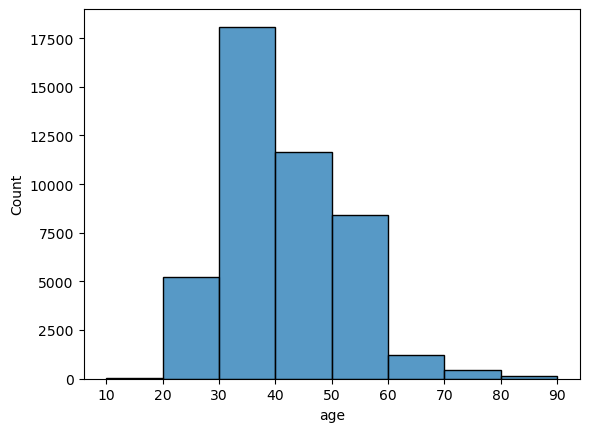

In [33]:
#Plotting a histogram to observe the age group distribution in the data set.

sns.histplot(df_copy["age"],bins=[10,20,30,40,50,60,70,80,90])

<AxesSubplot:xlabel='age', ylabel='Density'>

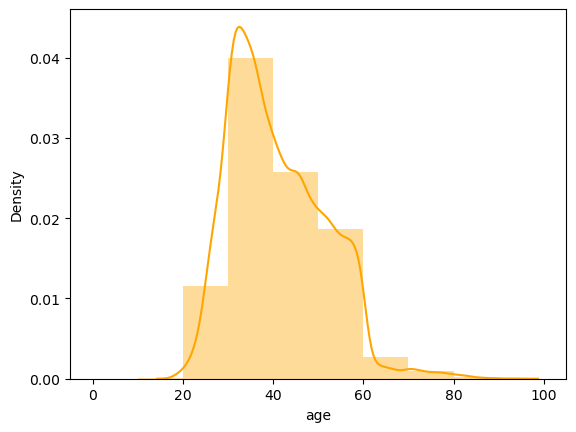

In [34]:
sns.distplot(df_copy['age'],bins=[0,10,20,30,40,50,60,70,80,90,100],color="Orange")

# Observation: 
    
* People of the age group 30 to 40 are the highest. 
* Mojority of the population belong to the age group ranging from 30 to 60 years

<AxesSubplot:xlabel='age', ylabel='count'>

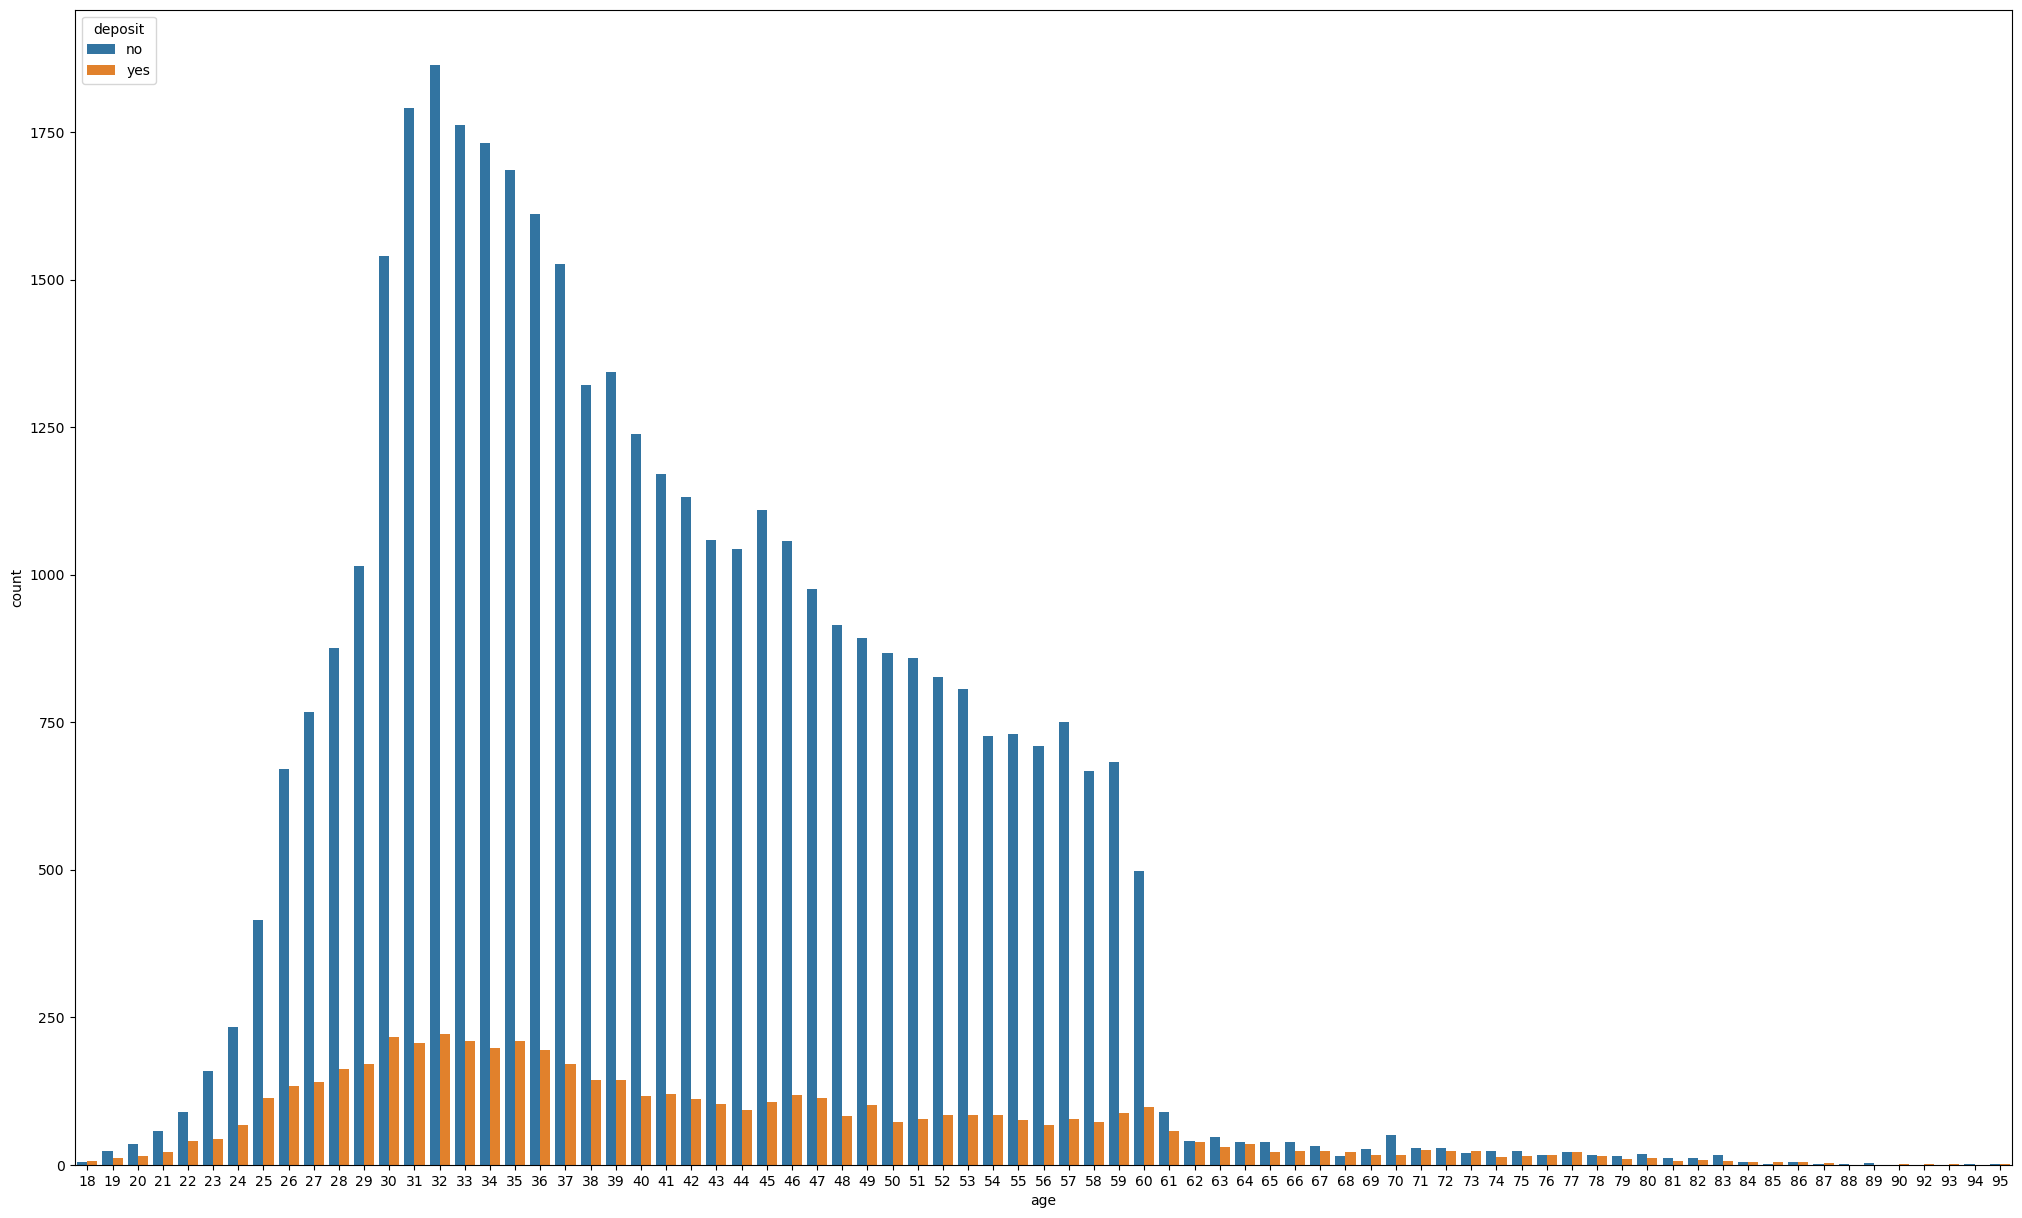

In [35]:
# Plotting a count plot to observe the count of the age of people who have deposited and not deposited respectivly

plt.figure(figsize=(25,15))
sns.countplot(df_copy["age"],hue=df_copy["deposit"])

# Observation:
    
* The people of the age of 30, 32, 35 have the highest subscribers for the deposits
* The people of the age groups ranging from 24 to 61 have majorly subscribed for the deposits.

<AxesSubplot:xlabel='job', ylabel='count'>

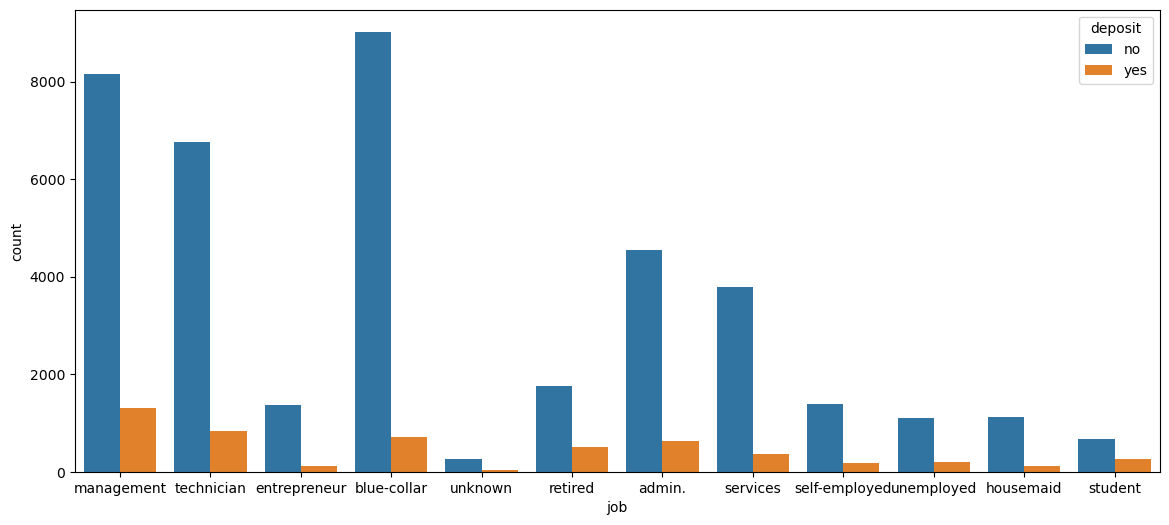

In [36]:
plt.figure(figsize=(14,6))
sns.countplot(df_copy["job"],hue=df_copy["deposit"])

# Observation:
    
* People in the management jobs have the highest number of subscriptions of deposits.
* People in the technician and blue-collar jobs have the similar number of subscriptions as per the graph.
* The Unknown jobs have the least subscriptions.

<AxesSubplot:xlabel='marital', ylabel='count'>

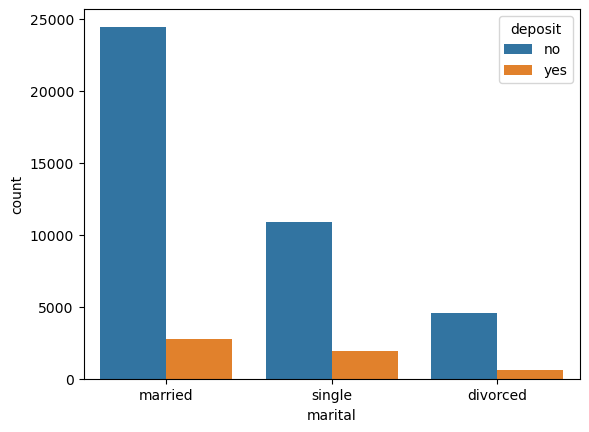

In [37]:
sns.countplot(df_copy["marital"],hue=df_copy["deposit"])

# Observations:
    
* Marrried people have mostly subscribed for the deposits
* The Divorced people have the least number of subscriptions for the deposit

<AxesSubplot:xlabel='education', ylabel='count'>

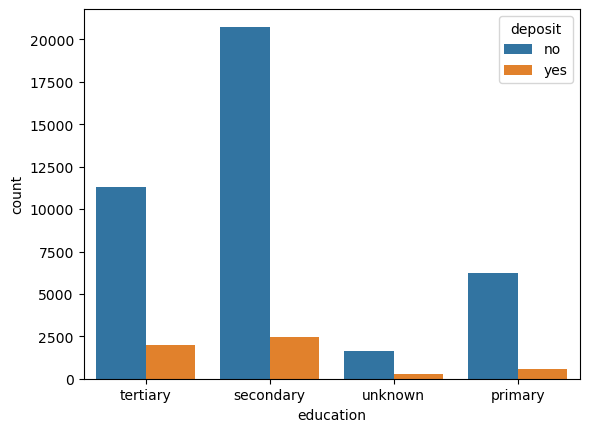

In [38]:
sns.countplot(df_copy["education"],hue=df_copy["deposit"])

# Observation:
    
* People with the secondary education have the highhest number of subscribers for the deposits.
* The second highest number of subscribers have the tertiary education.
* The lest number of subscriber `s education is unknown

<AxesSubplot:xlabel='default', ylabel='count'>

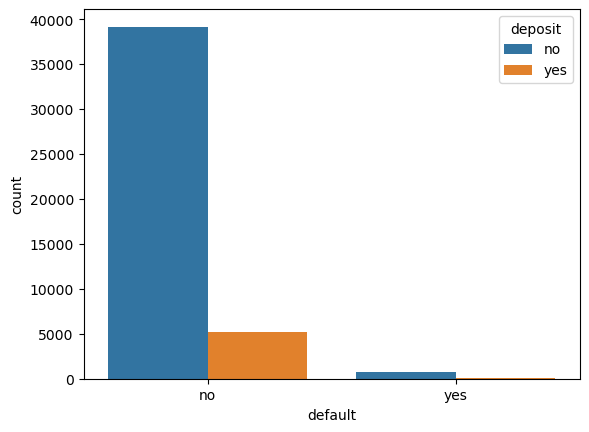

In [39]:
sns.countplot(df_copy["default"],hue=df_copy["deposit"])

# Observation:
    
* About 5000 Non-Defaulters have subscribed for deposits. 

<AxesSubplot:xlabel='housing', ylabel='count'>

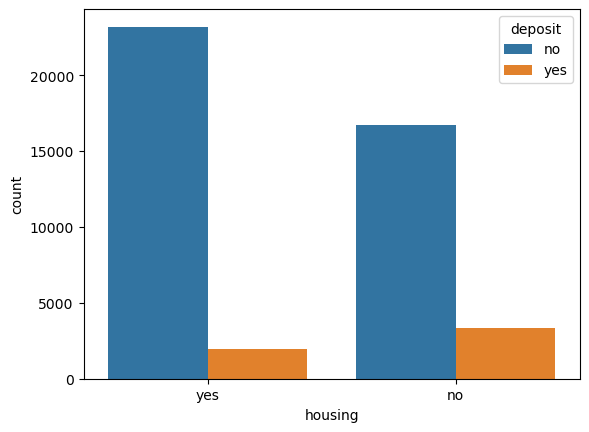

In [40]:
sns.countplot(df_copy["housing"],hue=df_copy["deposit"])

# Observation:

* People who don`t have housing loan have majorly subscribed for the deposits.

In [41]:
sns.countplot(df_copy["loan"],hue=df_copy["deposit"])

<AxesSubplot:xlabel='loan', ylabel='count'>

# Observation:

* People who don`t have any loan have majorly subscribed for the deposits.

<AxesSubplot:xlabel='contact', ylabel='count'>

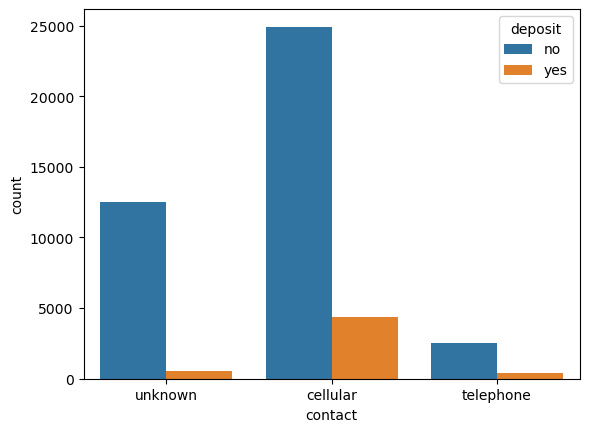

In [42]:
sns.countplot(df_copy["contact"],hue=df_copy["deposit"])

# Observation:

* The cellular Contact mode of the customer has the major number of subscriptions for the deposits when compared to the other modes of communication.

In [43]:
sns.countplot(df_copy["month"],hue=df_copy["deposit"])

<AxesSubplot:xlabel='month', ylabel='count'>

<AxesSubplot:xlabel='poutcome', ylabel='count'>

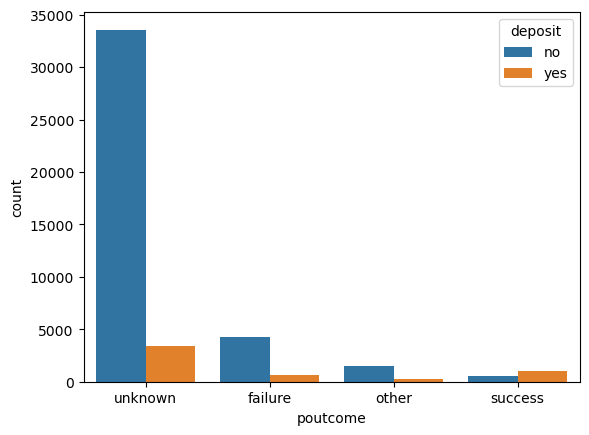

In [44]:
sns.countplot(df_copy["poutcome"],hue=df_copy["deposit"])

In [45]:
df_copy

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      deposit  
0          no  
1          no  
2          no  
3          no  
4          no  
...       ...  
45206     yes  
45207     yes  
45208     yes  
45209      no  
45210      no  

[45211 rows x 17 columns]

<AxesSubplot:xlabel='age', ylabel='balance'>

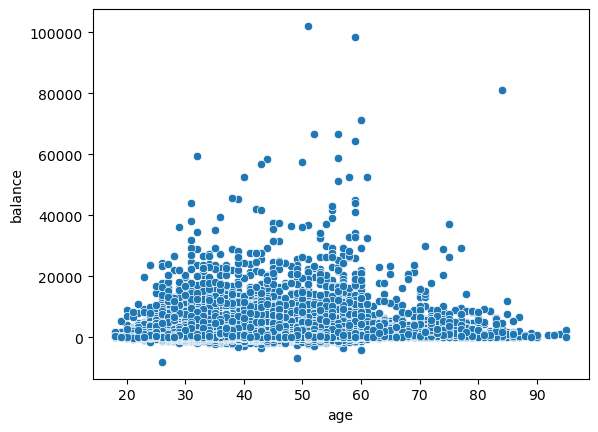

In [46]:
sns.scatterplot(x='age',y='balance',data=df_copy)

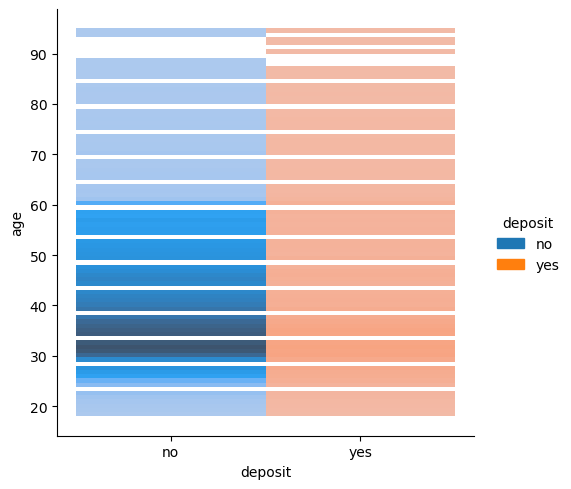

In [47]:
sns.displot(x='deposit',y='age',data=df_copy,hue='deposit',color="green")

<Figure size 1200x600 with 0 Axes>

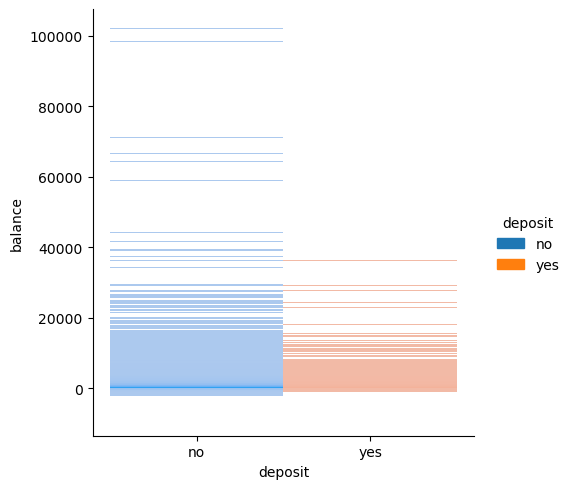

In [48]:
plt.figure(figsize=(12,6))
sns.displot(x='deposit',y='balance',data=df_copy,hue='deposit')

<AxesSubplot:xlabel='balance', ylabel='education'>

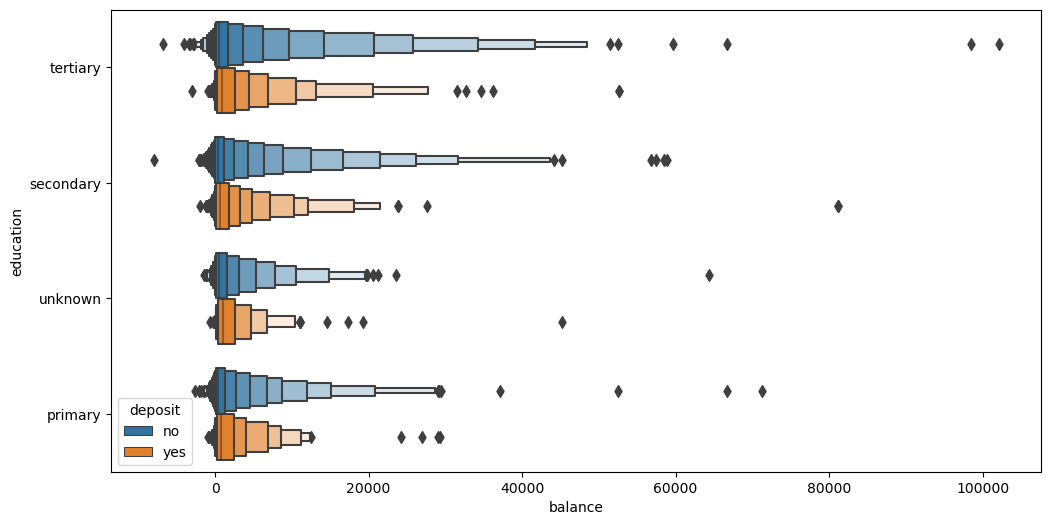

In [49]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='balance',y='education',data=df_copy,hue='deposit',scale="linear",showfliers=True)

<AxesSubplot:xlabel='balance', ylabel='job'>

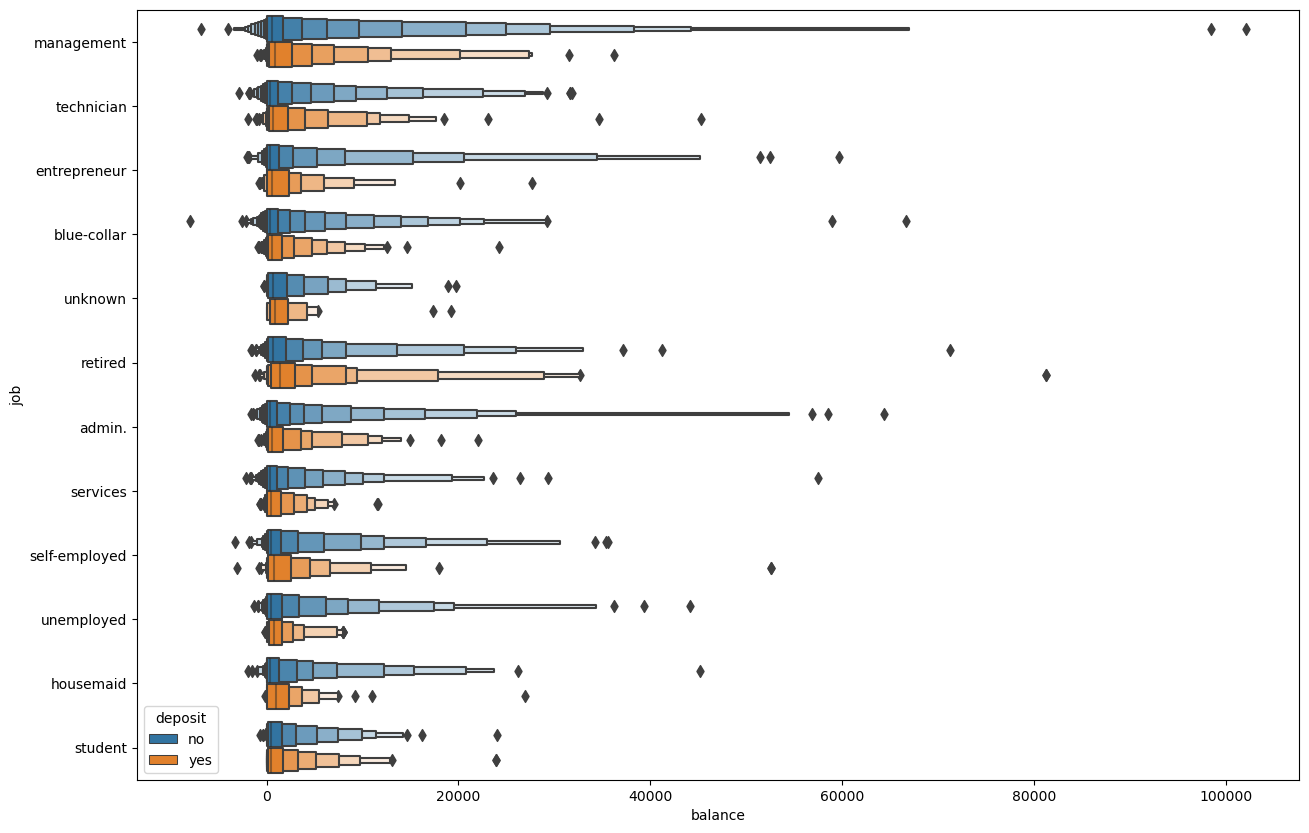

In [50]:
plt.figure(figsize=(15,10))
sns.boxenplot(x='balance',y='job',data=df_copy,hue='deposit',scale="linear",k_depth="trustworthy",
             showfliers=True)

# Observation: People who are retired have opted for the deposit subscription.

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(x='marital',y='age',data=df_copy,hue='deposit')

<AxesSubplot:xlabel='marital', ylabel='age'>

In [52]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='housing',y='balance',data=df_copy,hue='deposit',scale="linear",k_depth="trustworthy")

<AxesSubplot:xlabel='housing', ylabel='balance'>

# Observation: People who have no housing loan have opted for the deposit subscription.

<AxesSubplot:xlabel='loan', ylabel='balance'>

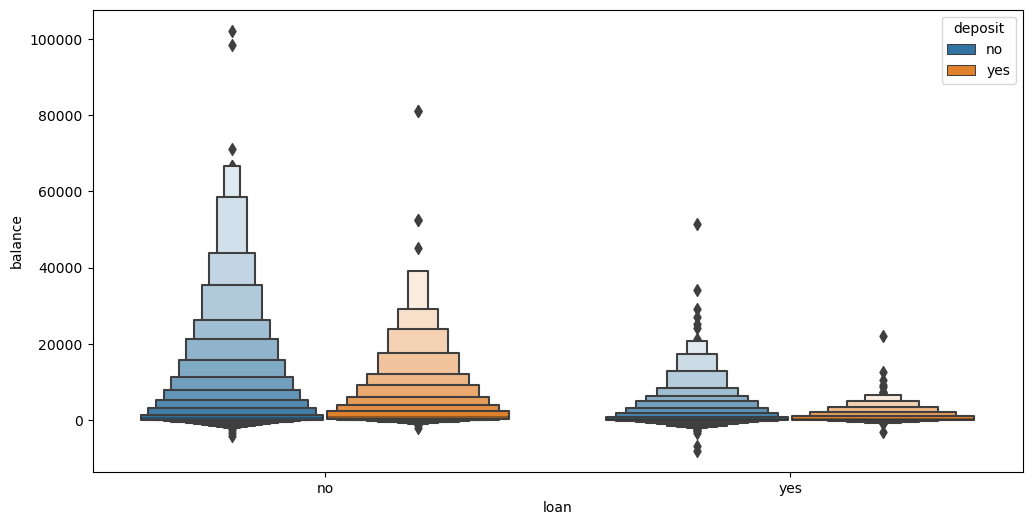

In [53]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='loan',y='balance',data=df_copy,hue='deposit',scale="linear",showfliers=True)

In [163]:
# Trying pandas profiling to check more information regarding the data.
from pandas_profiling import ProfileReport

In [164]:
pandas_profile = ProfileReport(df_train)

In [165]:
pandas_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. Perform Feature engineering and feature selection to reduce the noise from the data and prepare the data for data modeling.

In [54]:
# Creating a list of columns
col=list(df_copy.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

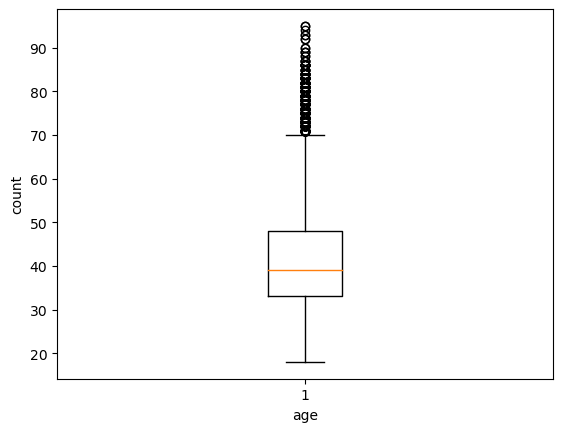

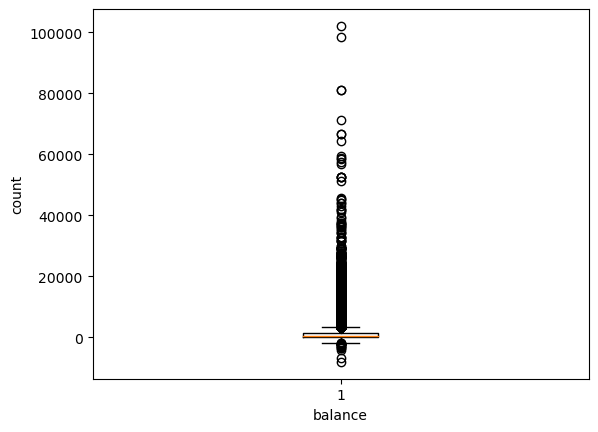

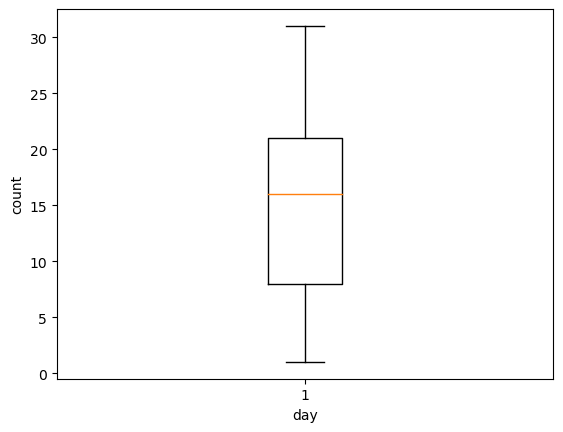

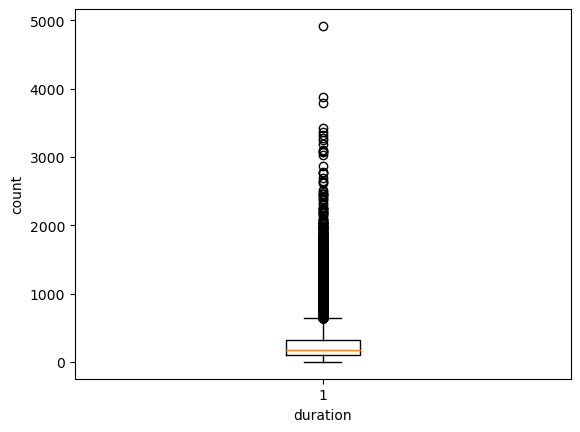

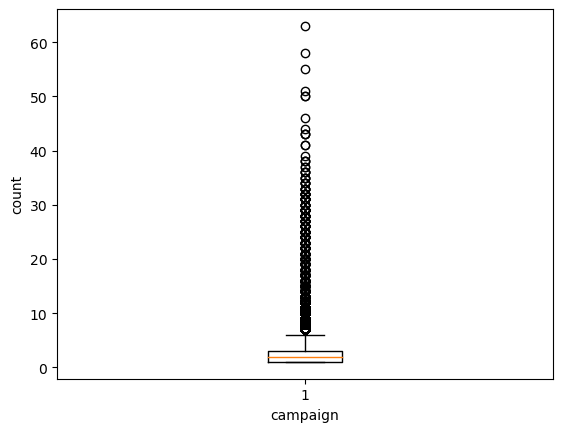

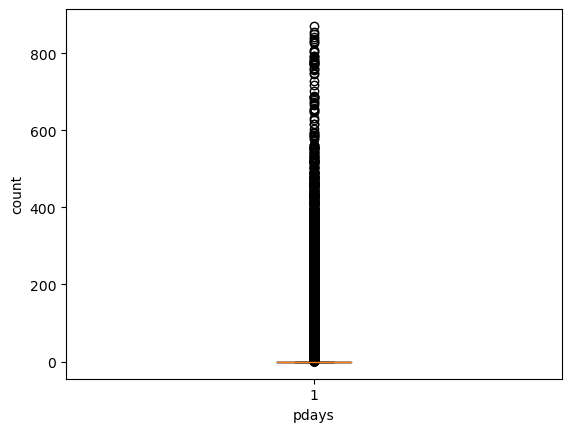

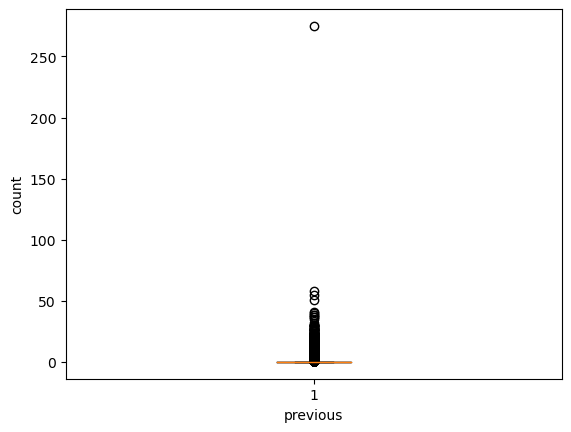

In [55]:
# Checking for outliers in the train data set
for col_name in col:
    if df_copy[col_name].dtypes==object:
        pass
    else:
        plt.boxplot(df_copy[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

As we can observe that outlies are present in the following columns

* age
* balance
* duration
* campaign
* pdays
* previous

Hence applying the Interquartile Range to remove the outliers

In [56]:
# Removing the outliers 

Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

df_train_no_outliers = df_copy[~((df_copy < (Q1 - 1.5 * IQR)) |(df_copy > (Q3 + 1.5 * IQR))).any(axis=1)]
df_train_no_outliers

age           job  marital  education default  balance housing loan  \
0       58    management  married   tertiary      no     2143     yes   no   
1       44    technician   single  secondary      no       29     yes   no   
2       33  entrepreneur  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45198   37    management  married   tertiary      no     1428      no   no   
45202   34        admin.   single  secondary      no      557      no   no   
45203   23       student   single   tertiary      no      113      no   no   
45205   25    technician   single  secondary      no      505      no  yes   
45209   57   blue-collar  married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45198   cellular   16   nov       333         2     -1         0  unknown   
45202   cellular   17   nov       224         1     -1         0  unknown   
45203   cellular   17   nov       266         1     -1         0  unknown   
45205   cellular   17   nov       386         2     -1         0  unknown   
45209  telephone   17   nov       508         4     -1         0  unknown   

      deposit  
0          no  
1          no  
2          no  
3          no  
4          no  
...       ...  
45198      no  
45202     yes  
45203     yes  
45205     yes  
45209      no  

[28193 rows x 17 columns]

In [57]:
#printing the Interquartile Range
print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


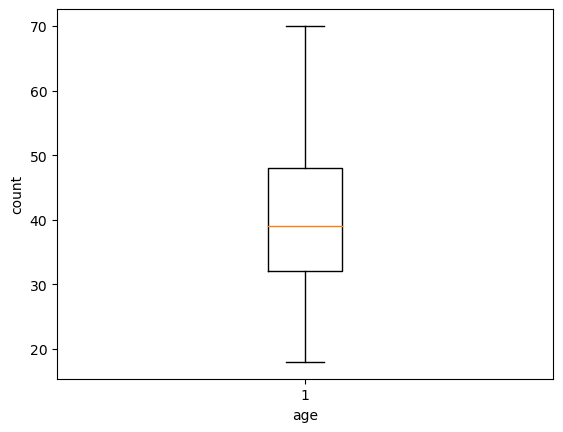

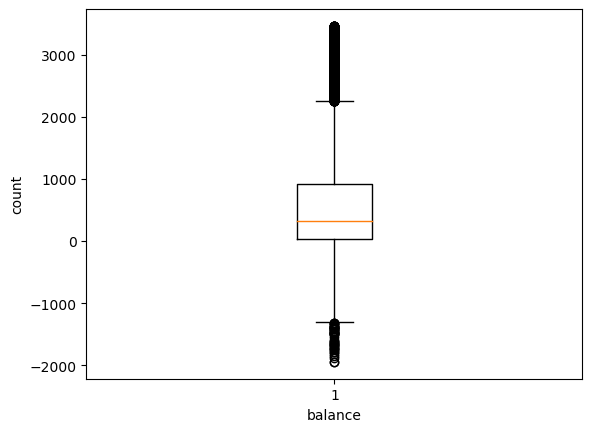

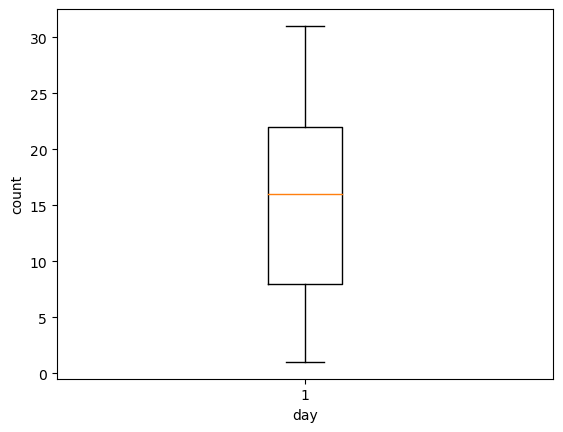

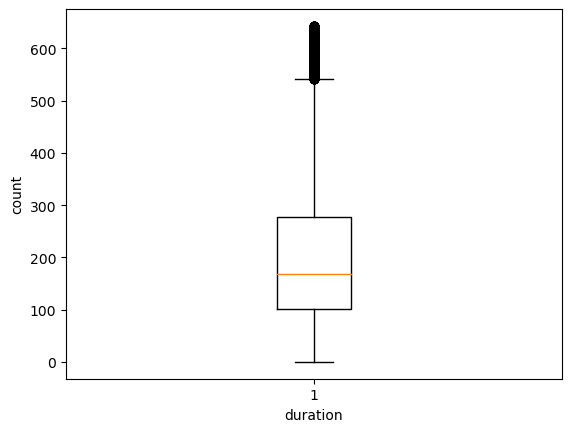

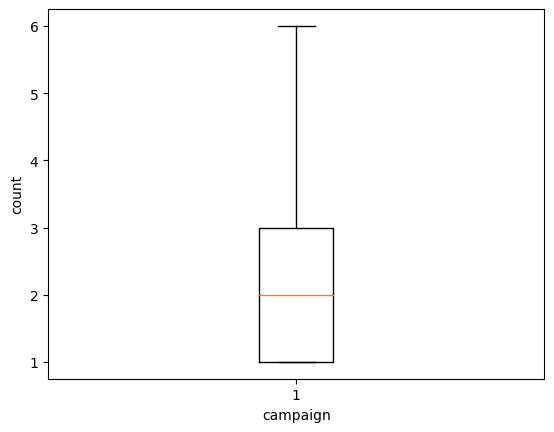

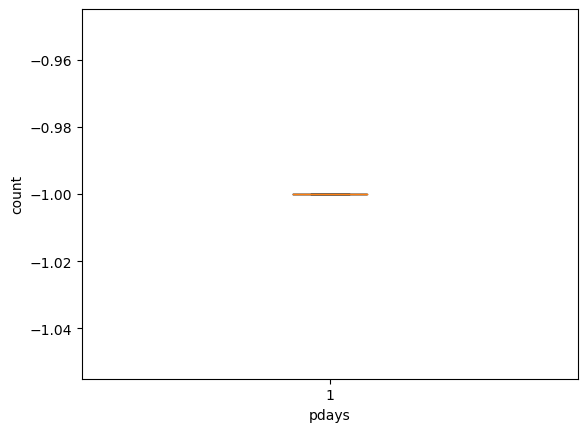

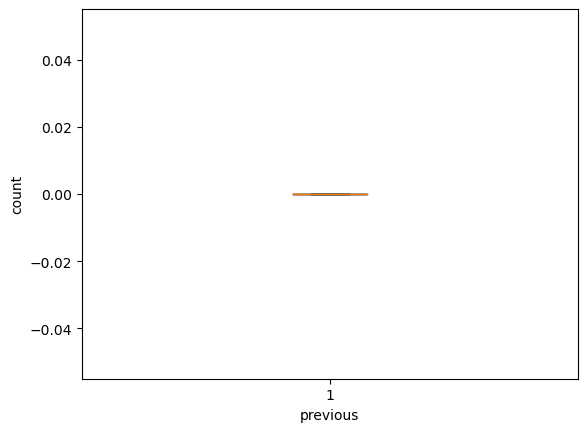

In [58]:
# Checking for outliers in the train data set after handling the outliers
for col_name in col:
    if df_train_no_outliers[col_name].dtypes==object:
        pass
    else:
        plt.boxplot(df_train_no_outliers[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [59]:
df_train_no_outliers.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [60]:
df_train_no_outliers.tail()

age          job  marital  education default  balance housing loan  \
45198   37   management  married   tertiary      no     1428      no   no   
45202   34       admin.   single  secondary      no      557      no   no   
45203   23      student   single   tertiary      no      113      no   no   
45205   25   technician   single  secondary      no      505      no  yes   
45209   57  blue-collar  married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45198   cellular   16   nov       333         2     -1         0  unknown   
45202   cellular   17   nov       224         1     -1         0  unknown   
45203   cellular   17   nov       266         1     -1         0  unknown   
45205   cellular   17   nov       386         2     -1         0  unknown   
45209  telephone   17   nov       508         4     -1         0  unknown   

      deposit  
45198      no  
45202     yes  
45203     yes  
45205     yes  
45209      no

In [61]:
# Comparing the the statistical summary of the data frame of both the data sets i.e, before removing the outliers, &
# after removing the outliers.

print("Statistical Summary before removing the Outliers:")

df_copy.describe().transpose()

Statistical Summary before removing the Outliers:


count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [62]:
print("Statistical Summary after removing Outliers:")

df_train_no_outliers.describe().transpose()

Statistical Summary after removing Outliers:


count        mean         std     min    25%    50%    75%     max
age       28193.0   40.373639    9.884503    18.0   32.0   39.0   48.0    70.0
balance   28193.0  606.670344  831.950484 -1944.0   31.0  317.0  920.0  3462.0
day       28193.0   15.775015    8.356767     1.0    8.0   16.0   22.0    31.0
duration  28193.0  205.355833  139.320091     0.0  101.0  169.0  277.0   643.0
campaign  28193.0    2.189692    1.341640     1.0    1.0    2.0    3.0     6.0
pdays     28193.0   -1.000000    0.000000    -1.0   -1.0   -1.0   -1.0    -1.0
previous  28193.0    0.000000    0.000000     0.0    0.0    0.0    0.0     0.0

In [63]:
# Creating new list of columns 
columns_list=list(df_train_no_outliers.columns)
columns_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [64]:
df_train_no_outliers.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [65]:
# Removing the target column from the new column list

columns_list.remove('deposit')
columns_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [66]:
df_train_no_outliers['age'].value_counts()

31    1297
32    1289
33    1224
35    1178
34    1167
36    1148
30    1126
37    1033
39     926
38     897
40     843
41     818
42     802
29     784
45     777
46     771
44     731
43     716
47     697
28     664
49     663
48     627
51     613
52     610
27     597
50     592
53     553
26     529
57     519
55     507
56     500
54     497
59     480
58     444
25     370
60     344
24     205
23     123
22      88
61      75
21      59
63      40
64      36
20      32
62      30
66      29
65      28
67      26
70      24
69      22
19      21
68      13
18       9
Name: age, dtype: int64

In [67]:
# Binning the age column 

bins=[0,25,50,75,100]
df_train_no_outliers['age']=pd.cut(df_train_no_outliers['age'],bins)
df_train_no_outliers['age']=df_train_no_outliers.age.astype('str')

In [68]:
df_train_no_outliers

age           job  marital  education default  balance housing  \
0      (50, 75]    management  married   tertiary      no     2143     yes   
1      (25, 50]    technician   single  secondary      no       29     yes   
2      (25, 50]  entrepreneur  married  secondary      no        2     yes   
3      (25, 50]   blue-collar  married    unknown      no     1506     yes   
4      (25, 50]       unknown   single    unknown      no        1      no   
...         ...           ...      ...        ...     ...      ...     ...   
45198  (25, 50]    management  married   tertiary      no     1428      no   
45202  (25, 50]        admin.   single  secondary      no      557      no   
45203   (0, 25]       student   single   tertiary      no      113      no   
45205   (0, 25]    technician   single  secondary      no      505      no   
45209  (50, 75]   blue-collar  married  secondary      no      668      no   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no    unknown    5   may       261         1     -1         0   
1       no    unknown    5   may       151         1     -1         0   
2      yes    unknown    5   may        76         1     -1         0   
3       no    unknown    5   may        92         1     -1         0   
4       no    unknown    5   may       198         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
45198   no   cellular   16   nov       333         2     -1         0   
45202   no   cellular   17   nov       224         1     -1         0   
45203   no   cellular   17   nov       266         1     -1         0   
45205  yes   cellular   17   nov       386         2     -1         0   
45209   no  telephone   17   nov       508         4     -1         0   

      poutcome deposit  
0      unknown      no  
1      unknown      no  
2      unknown      no  
3      unknown      no  
4      unknown      no  
...        ...     ...  
45198  unknown      no  
45202  unknown     yes  
45203  unknown     yes  
45205  unknown     yes  
45209  unknown      no  

[28193 rows x 17 columns]

In [69]:
# Checking the value counts of the age column after binning the column
df_train_no_outliers["age"].value_counts()

(25, 50]    21896
(50, 75]     5390
(0, 25]       907
Name: age, dtype: int64

In [70]:
# Creating a list of the columns that are object data type

columns_list_object_dtypes=[]
for i in df_train_no_outliers.columns:
    if((df_train_no_outliers[i].dtypes=='object') & (i!='deposit')):
        columns_list_object_dtypes.append(i)

In [71]:
for x in columns_list_object_dtypes:
    print(f'\nThe Number of Unique Values in {x} column = ', df_train_no_outliers[x].nunique())


The Number of Unique Values in age column =  3

The Number of Unique Values in job column =  12

The Number of Unique Values in marital column =  3

The Number of Unique Values in education column =  4

The Number of Unique Values in default column =  2

The Number of Unique Values in housing column =  2

The Number of Unique Values in loan column =  2

The Number of Unique Values in contact column =  3

The Number of Unique Values in month column =  12

The Number of Unique Values in poutcome column =  1


In [72]:
df_train_no_outliers['deposit']=np.where(df_train_no_outliers['deposit']=='yes',1,0)
df_train_no_outliers['deposit'].dtype

dtype('int64')

In [73]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [74]:
lst=[]
for i in range(df_train_no_outliers['age'].nunique()):
        val=list(df_train_no_outliers['age'].unique())[i]
        lst.append({
            'Value':val,
            'All':df_train_no_outliers[df_train_no_outliers['age']==val].count()['age'],
            'Good':df_train_no_outliers[(df_train_no_outliers['age']==val) & (df_train_no_outliers['deposit']==1)].count()['age'],
            'Bad':df_train_no_outliers[(df_train_no_outliers['age']==val) & (df_train_no_outliers['deposit']==0)].count()['age']
        })
        
dset=pd.DataFrame(lst)
dset['Distr_Good']=dset['Good']/dset['Good'].sum()
dset['Distr_Bad']=dset['Bad']/dset['Bad'].sum()
dset['WoE']=np.log(dset['Distr_Good']/dset['Distr_Bad'])
dset=dset.replace({'WoE':{np.inf:0,-np.inf:0}})
dset['IV']=(dset['Distr_Good']-dset['Distr_Bad'])*dset['WoE']
iv=dset.sort_values(by='WoE')

In [75]:
df_new =pd.DataFrame(columns=['Feature','IV-Score'])

In [76]:
col_list = list(df_train_no_outliers.columns)
for col in col_list:
    if col == 'deposit': 
        continue
    elif df_train_no_outliers[col].dtype == 'object':
        df, iv = calculate_woe_iv(df_train_no_outliers, col, 'deposit')
        df_new=df_new.append({'Feature':col, 'IV-Score': iv}, ignore_index=True)
df_new

Feature  IV-Score
0        age  0.099165
1        job  0.205116
2    marital  0.086625
3  education  0.101151
4    default  0.004638
5    housing  0.310357
6       loan  0.082321
7    contact  0.526937
8      month  0.772015
9   poutcome  0.000000

In [77]:
df

Value    All  Good    Bad  Distr_Good  Distr_Bad  WoE   IV
0  unknown  28193  1599  26594         1.0        1.0  0.0  0.0

In [78]:
df_new.iloc[0:18]

Feature  IV-Score
0        age  0.099165
1        job  0.205116
2    marital  0.086625
3  education  0.101151
4    default  0.004638
5    housing  0.310357
6       loan  0.082321
7    contact  0.526937
8      month  0.772015
9   poutcome  0.000000

In [ ]:
df_train_no_outliers.drop(columns=['default','loan','poutcome'],inplace=True)

In [79]:
df_train_no_outliers

age           job  marital  education default  balance housing  \
0      (50, 75]    management  married   tertiary      no     2143     yes   
1      (25, 50]    technician   single  secondary      no       29     yes   
2      (25, 50]  entrepreneur  married  secondary      no        2     yes   
3      (25, 50]   blue-collar  married    unknown      no     1506     yes   
4      (25, 50]       unknown   single    unknown      no        1      no   
...         ...           ...      ...        ...     ...      ...     ...   
45198  (25, 50]    management  married   tertiary      no     1428      no   
45202  (25, 50]        admin.   single  secondary      no      557      no   
45203   (0, 25]       student   single   tertiary      no      113      no   
45205   (0, 25]    technician   single  secondary      no      505      no   
45209  (50, 75]   blue-collar  married  secondary      no      668      no   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no    unknown    5   may       261         1     -1         0   
1       no    unknown    5   may       151         1     -1         0   
2      yes    unknown    5   may        76         1     -1         0   
3       no    unknown    5   may        92         1     -1         0   
4       no    unknown    5   may       198         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
45198   no   cellular   16   nov       333         2     -1         0   
45202   no   cellular   17   nov       224         1     -1         0   
45203   no   cellular   17   nov       266         1     -1         0   
45205  yes   cellular   17   nov       386         2     -1         0   
45209   no  telephone   17   nov       508         4     -1         0   

      poutcome  deposit  
0      unknown        0  
1      unknown        0  
2      unknown        0  
3      unknown        0  
4      unknown        0  
...        ...      ...  
45198  unknown        0  
45202  unknown        1  
45203  unknown        1  
45205  unknown        1  
45209  unknown        0  

[28193 rows x 17 columns]

In [80]:
df_train_no_outliers = pd.DataFrame(df_train_no_outliers)

# Working on the Train data

In [81]:
x_train = df_train_no_outliers.drop(['deposit'], axis=1)
x_train

age           job  marital  education default  balance housing  \
0      (50, 75]    management  married   tertiary      no     2143     yes   
1      (25, 50]    technician   single  secondary      no       29     yes   
2      (25, 50]  entrepreneur  married  secondary      no        2     yes   
3      (25, 50]   blue-collar  married    unknown      no     1506     yes   
4      (25, 50]       unknown   single    unknown      no        1      no   
...         ...           ...      ...        ...     ...      ...     ...   
45198  (25, 50]    management  married   tertiary      no     1428      no   
45202  (25, 50]        admin.   single  secondary      no      557      no   
45203   (0, 25]       student   single   tertiary      no      113      no   
45205   (0, 25]    technician   single  secondary      no      505      no   
45209  (50, 75]   blue-collar  married  secondary      no      668      no   

      loan    contact  day month  duration  campaign  pdays  previous poutcome  
0       no    unknown    5   may       261         1     -1         0  unknown  
1       no    unknown    5   may       151         1     -1         0  unknown  
2      yes    unknown    5   may        76         1     -1         0  unknown  
3       no    unknown    5   may        92         1     -1         0  unknown  
4       no    unknown    5   may       198         1     -1         0  unknown  
...    ...        ...  ...   ...       ...       ...    ...       ...      ...  
45198   no   cellular   16   nov       333         2     -1         0  unknown  
45202   no   cellular   17   nov       224         1     -1         0  unknown  
45203   no   cellular   17   nov       266         1     -1         0  unknown  
45205  yes   cellular   17   nov       386         2     -1         0  unknown  
45209   no  telephone   17   nov       508         4     -1         0  unknown  

[28193 rows x 16 columns]

In [82]:
y_train = df_train_no_outliers["deposit"]
y_train

0        0
1        0
2        0
3        0
4        0
        ..
45198    0
45202    1
45203    1
45205    1
45209    0
Name: deposit, Length: 28193, dtype: int64

In [83]:
# Creating a list of the columns that are object data type

columns_list_object_dtypes=[]
for i in x_train.columns:
    if((x_train[i].dtypes=='object')):
        columns_list_object_dtypes.append(i)

In [84]:
columns_list_object_dtypes

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [85]:
for x in columns_list_object_dtypes:
    print(f'\nThe Unique Values in {x} column = ', x_train[x].nunique())


The Unique Values in age column =  3

The Unique Values in job column =  12

The Unique Values in marital column =  3

The Unique Values in education column =  4

The Unique Values in default column =  2

The Unique Values in housing column =  2

The Unique Values in loan column =  2

The Unique Values in contact column =  3

The Unique Values in month column =  12

The Unique Values in poutcome column =  1


In [86]:
# Creating a list of the columns that are int data type

columns_list_int_dtypes=[]
for i in x_train.columns:
    if((x_train[i].dtypes=='int64')):
        columns_list_int_dtypes.append(i)

In [87]:
columns_list_int_dtypes

['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [88]:
for x in columns_list_int_dtypes:
    print(f'\nThe Unique Values in {x} column = ', x_train[x].nunique())


The Unique Values in balance column =  4006

The Unique Values in day column =  31

The Unique Values in duration column =  643

The Unique Values in campaign column =  6

The Unique Values in pdays column =  1

The Unique Values in previous column =  1


In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from sklearn.preprocessing import StandardScaler

In [90]:
ordinal_encoder = OrdinalEncoder()
binarizer_encoder = preprocessing.LabelBinarizer()
label_encoder = preprocessing.LabelEncoder()

In [91]:
x_train = pd.get_dummies(x_train, prefix=['Job', 'Marital','Contact', 'Poutcome'], 
               columns=['job','marital','contact', 'poutcome'])

In [92]:
x_train.head()

age  education default  balance housing loan  day month  duration  \
0  (50, 75]   tertiary      no     2143     yes   no    5   may       261   
1  (25, 50]  secondary      no       29     yes   no    5   may       151   
2  (25, 50]  secondary      no        2     yes  yes    5   may        76   
3  (25, 50]    unknown      no     1506     yes   no    5   may        92   
4  (25, 50]    unknown      no        1      no   no    5   may       198   

   campaign  ...  Job_technician  Job_unemployed  Job_unknown  \
0         1  ...               0               0            0   
1         1  ...               1               0            0   
2         1  ...               0               0            0   
3         1  ...               0               0            0   
4         1  ...               0               0            1   

   Marital_divorced  Marital_married  Marital_single  Contact_cellular  \
0                 0                1               0                 0   
1                 0                0               1                 0   
2                 0                1               0                 0   
3                 0                1               0                 0   
4                 0                0               1                 0   

   Contact_telephone  Contact_unknown  Poutcome_unknown  
0                  0                1                 1  
1                  0                1                 1  
2                  0                1                 1  
3                  0                1                 1  
4                  0                1                 1  

[5 rows x 31 columns]

In [93]:
x_train.shape

(28193, 31)

In [94]:
oe = ordinal_encoder.fit_transform(asarray(x_train['education']).reshape(-1,1))
oe = oe.reshape(28193,)
x_train['education'] = oe
x_train.head()

age  education default  balance housing loan  day month  duration  \
0  (50, 75]        2.0      no     2143     yes   no    5   may       261   
1  (25, 50]        1.0      no       29     yes   no    5   may       151   
2  (25, 50]        1.0      no        2     yes  yes    5   may        76   
3  (25, 50]        3.0      no     1506     yes   no    5   may        92   
4  (25, 50]        3.0      no        1      no   no    5   may       198   

   campaign  ...  Job_technician  Job_unemployed  Job_unknown  \
0         1  ...               0               0            0   
1         1  ...               1               0            0   
2         1  ...               0               0            0   
3         1  ...               0               0            0   
4         1  ...               0               0            1   

   Marital_divorced  Marital_married  Marital_single  Contact_cellular  \
0                 0                1               0                 0   
1                 0                0               1                 0   
2                 0                1               0                 0   
3                 0                1               0                 0   
4                 0                0               1                 0   

   Contact_telephone  Contact_unknown  Poutcome_unknown  
0                  0                1                 1  
1                  0                1                 1  
2                  0                1                 1  
3                  0                1                 1  
4                  0                1                 1  

[5 rows x 31 columns]

In [95]:
# Applying label encoding to all the object data type columns

remaining_column_list = ['age','loan', 'housing', 'default']


from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in remaining_column_list:
    x_train[i]=labelencoder.fit_transform(x_train[i])

In [96]:
x_train.head()

age  education  default  balance  housing  loan  day month  duration  \
0    2        2.0        0     2143        1     0    5   may       261   
1    1        1.0        0       29        1     0    5   may       151   
2    1        1.0        0        2        1     1    5   may        76   
3    1        3.0        0     1506        1     0    5   may        92   
4    1        3.0        0        1        0     0    5   may       198   

   campaign  ...  Job_technician  Job_unemployed  Job_unknown  \
0         1  ...               0               0            0   
1         1  ...               1               0            0   
2         1  ...               0               0            0   
3         1  ...               0               0            0   
4         1  ...               0               0            1   

   Marital_divorced  Marital_married  Marital_single  Contact_cellular  \
0                 0                1               0                 0   
1                 0                0               1                 0   
2                 0                1               0                 0   
3                 0                1               0                 0   
4                 0                0               1                 0   

   Contact_telephone  Contact_unknown  Poutcome_unknown  
0                  0                1                 1  
1                  0                1                 1  
2                  0                1                 1  
3                  0                1                 1  
4                  0                1                 1  

[5 rows x 31 columns]

In [97]:
months = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

x_train.month = x_train.month.map(months)

In [98]:
x_train.head()

age  education  default  balance  housing  loan  day  month  duration  \
0    2        2.0        0     2143        1     0    5      5       261   
1    1        1.0        0       29        1     0    5      5       151   
2    1        1.0        0        2        1     1    5      5        76   
3    1        3.0        0     1506        1     0    5      5        92   
4    1        3.0        0        1        0     0    5      5       198   

   campaign  ...  Job_technician  Job_unemployed  Job_unknown  \
0         1  ...               0               0            0   
1         1  ...               1               0            0   
2         1  ...               0               0            0   
3         1  ...               0               0            0   
4         1  ...               0               0            1   

   Marital_divorced  Marital_married  Marital_single  Contact_cellular  \
0                 0                1               0                 0   
1                 0                0               1                 0   
2                 0                1               0                 0   
3                 0                1               0                 0   
4                 0                0               1                 0   

   Contact_telephone  Contact_unknown  Poutcome_unknown  
0                  0                1                 1  
1                  0                1                 1  
2                  0                1                 1  
3                  0                1                 1  
4                  0                1                 1  

[5 rows x 31 columns]

In [99]:
df_train_no_outliers.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [100]:
x_train.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'Job_admin.',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Job_unknown',
       'Marital_divorced', 'Marital_married', 'Marital_single',
       'Contact_cellular', 'Contact_telephone', 'Contact_unknown',
       'Poutcome_unknown'],
      dtype='object')

In [101]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28193 entries, 0 to 45209
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                28193 non-null  int64  
 1   education          28193 non-null  float64
 2   default            28193 non-null  int64  
 3   balance            28193 non-null  int64  
 4   housing            28193 non-null  int64  
 5   loan               28193 non-null  int64  
 6   day                28193 non-null  int64  
 7   month              28193 non-null  int64  
 8   duration           28193 non-null  int64  
 9   campaign           28193 non-null  int64  
 10  pdays              28193 non-null  int64  
 11  previous           28193 non-null  int64  
 12  Job_admin.         28193 non-null  uint8  
 13  Job_blue-collar    28193 non-null  uint8  
 14  Job_entrepreneur   28193 non-null  uint8  
 15  Job_housemaid      28193 non-null  uint8  
 16  Job_management     281

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [103]:
x_train

array([[ 1.8896538 ,  1.07996519, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       ...,
       [-2.60423144,  1.07996519, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [-2.60423144, -0.26834136, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [ 1.8896538 , -0.26834136, -0.15093878, ...,  4.23187737,
        -0.75407607,  0.        ]])

# Working on the test data set

In [104]:
df_test_copy = df_test.copy()

In [105]:
# Creating a list of columns
col_test=list(df_test_copy.columns)
col_test

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

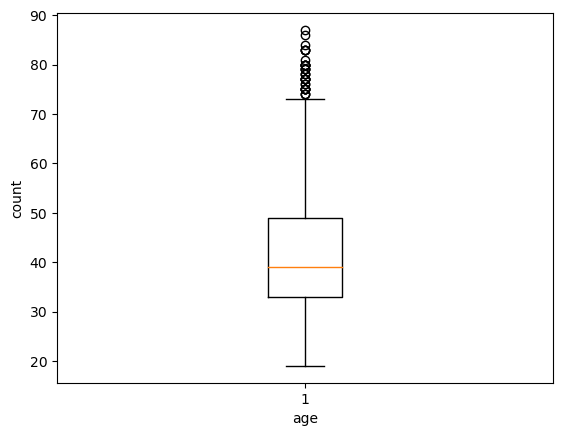

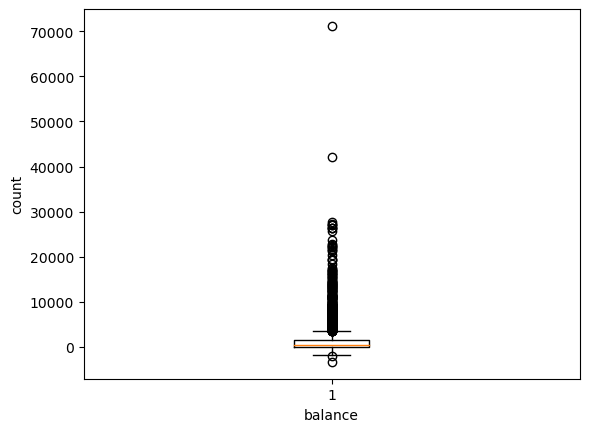

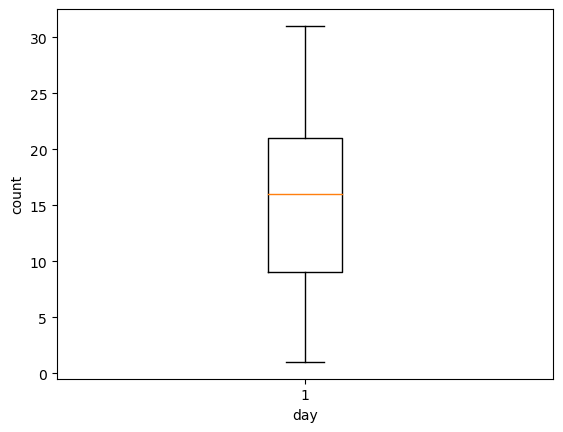

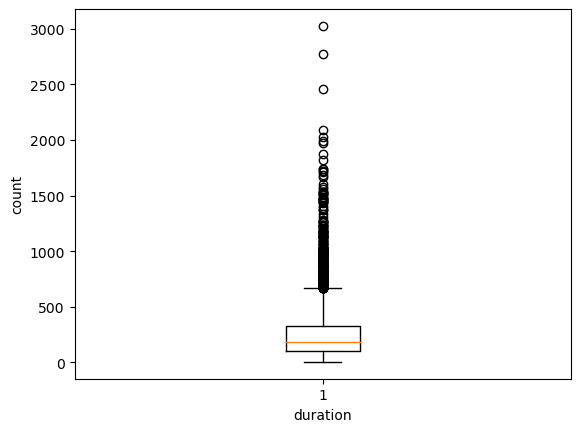

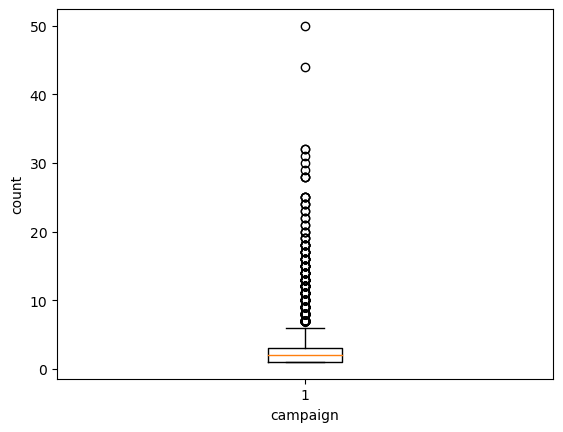

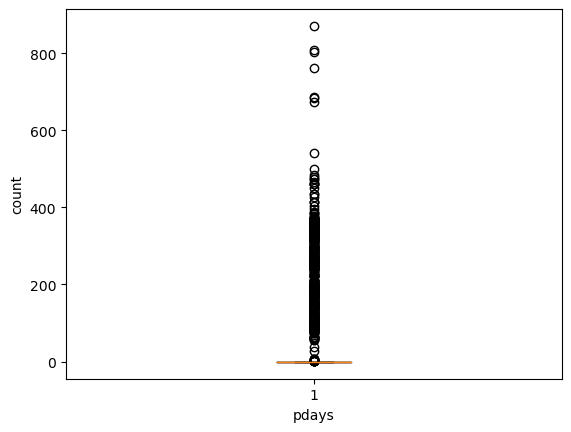

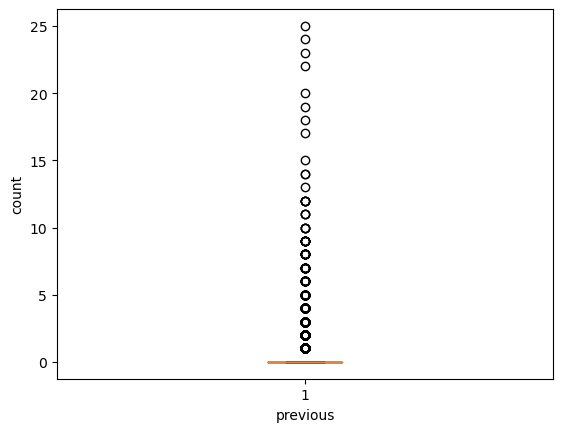

In [106]:
# Checking for outliers in the test data set
for col_name in col_test:
    if df_test_copy[col_name].dtypes==object:
        pass
    else:
        plt.boxplot(df_test_copy[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [107]:
# Removing the outliers 

Q1 = df_test_copy.quantile(0.25)
Q3 = df_test_copy.quantile(0.75)
IQR = Q3 - Q1

df_test_copy = df_test_copy[~((df_test_copy < (Q1 - 1.5 * IQR)) |(df_test_copy > (Q3 + 1.5 * IQR))).any(axis=1)]
df_test_copy

age           job   marital  education default  balance housing loan  \
0      30    unemployed   married    primary      no     1787      no   no   
3      30    management   married   tertiary      no     1476     yes  yes   
4      59   blue-collar   married  secondary      no        0     yes   no   
7      39    technician   married  secondary      no      147     yes   no   
8      41  entrepreneur   married   tertiary      no      221     yes   no   
...   ...           ...       ...        ...     ...      ...     ...  ...   
4510   36    technician  divorced  secondary      no      566     yes   no   
4512   40   blue-collar   married  secondary      no     1100     yes   no   
4513   49   blue-collar   married  secondary      no      322      no   no   
4515   32      services    single  secondary      no      473     yes   no   
4516   33      services   married  secondary      no     -333     yes   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
0     cellular   19   oct        79         1     -1         0  unknown   
3      unknown    3   jun       199         4     -1         0  unknown   
4      unknown    5   may       226         1     -1         0  unknown   
7     cellular    6   may       151         2     -1         0  unknown   
8      unknown   14   may        57         2     -1         0  unknown   
...        ...  ...   ...       ...       ...    ...       ...      ...   
4510   unknown   20   may       129         2     -1         0  unknown   
4512   unknown   29   may       660         2     -1         0  unknown   
4513  cellular   14   aug       356         2     -1         0  unknown   
4515  cellular    7   jul       624         5     -1         0  unknown   
4516  cellular   30   jul       329         5     -1         0  unknown   

     deposit  
0         no  
3         no  
4         no  
7         no  
8         no  
...      ...  
4510      no  
4512      no  
4513      no  
4515      no  
4516      no  

[2803 rows x 17 columns]

In [108]:
#printing the Interquartile Range
print(IQR)

age           16.0
balance     1411.0
day           12.0
duration     225.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


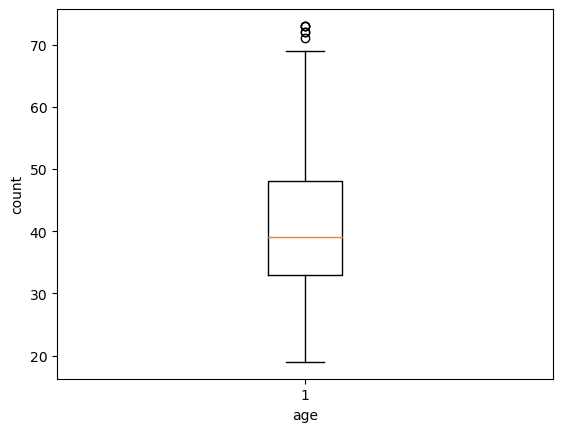

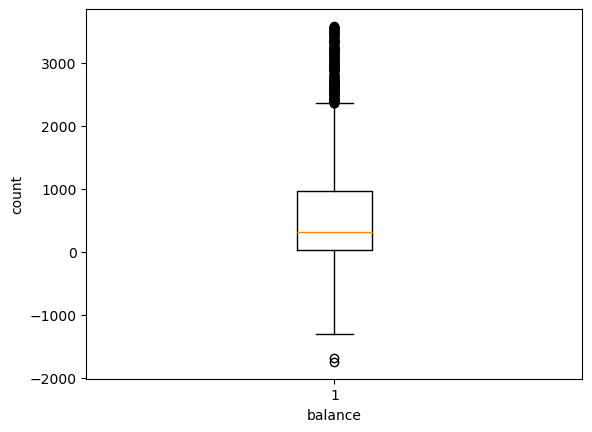

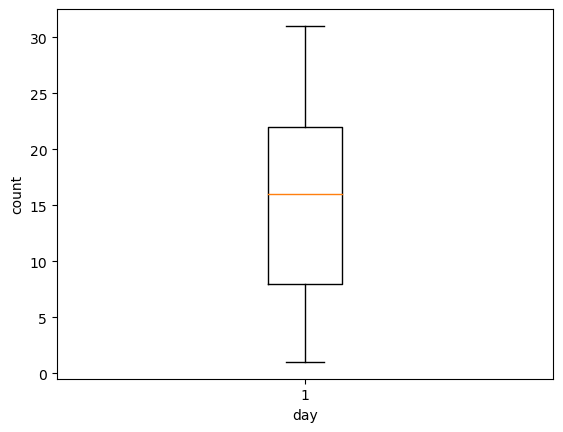

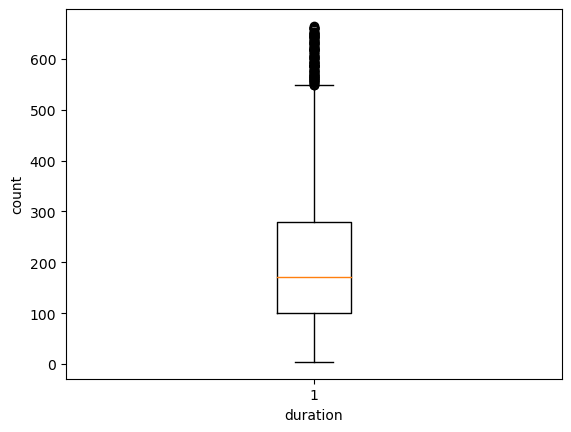

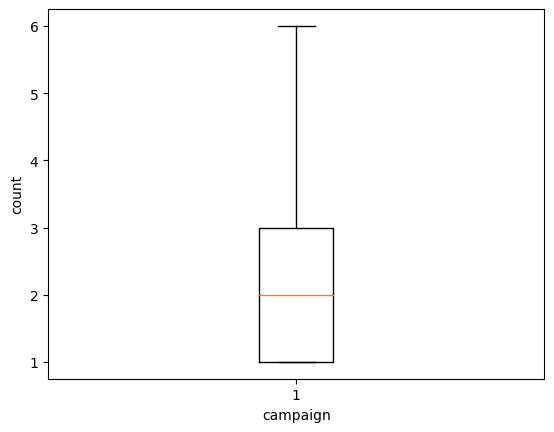

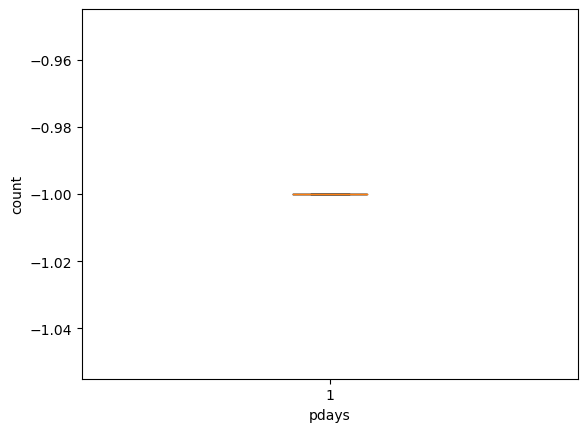

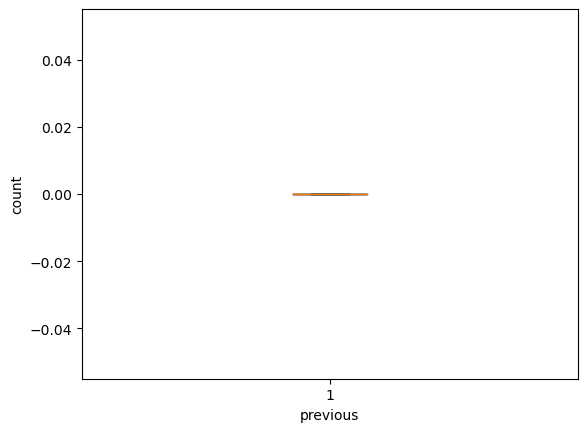

In [109]:
# Checking for outliers in the test data set
for col_name in col_test:
    if df_test_copy[col_name].dtypes==object:
        pass
    else:
        plt.boxplot(df_test_copy[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [110]:
df_test.shape

(4521, 17)

In [111]:
df_test_copy

age           job   marital  education default  balance housing loan  \
0      30    unemployed   married    primary      no     1787      no   no   
3      30    management   married   tertiary      no     1476     yes  yes   
4      59   blue-collar   married  secondary      no        0     yes   no   
7      39    technician   married  secondary      no      147     yes   no   
8      41  entrepreneur   married   tertiary      no      221     yes   no   
...   ...           ...       ...        ...     ...      ...     ...  ...   
4510   36    technician  divorced  secondary      no      566     yes   no   
4512   40   blue-collar   married  secondary      no     1100     yes   no   
4513   49   blue-collar   married  secondary      no      322      no   no   
4515   32      services    single  secondary      no      473     yes   no   
4516   33      services   married  secondary      no     -333     yes   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
0     cellular   19   oct        79         1     -1         0  unknown   
3      unknown    3   jun       199         4     -1         0  unknown   
4      unknown    5   may       226         1     -1         0  unknown   
7     cellular    6   may       151         2     -1         0  unknown   
8      unknown   14   may        57         2     -1         0  unknown   
...        ...  ...   ...       ...       ...    ...       ...      ...   
4510   unknown   20   may       129         2     -1         0  unknown   
4512   unknown   29   may       660         2     -1         0  unknown   
4513  cellular   14   aug       356         2     -1         0  unknown   
4515  cellular    7   jul       624         5     -1         0  unknown   
4516  cellular   30   jul       329         5     -1         0  unknown   

     deposit  
0         no  
3         no  
4         no  
7         no  
8         no  
...      ...  
4510      no  
4512      no  
4513      no  
4515      no  
4516      no  

[2803 rows x 17 columns]

In [112]:
# Binning the age column 

bins=[0,25,50,75,100]
df_test_copy['age']=pd.cut(df_test_copy['age'],bins)
df_test_copy['age']=df_test_copy.age.astype('str')

In [113]:
df_test_copy.head()

age           job  marital  education default  balance housing loan  \
0  (25, 50]    unemployed  married    primary      no     1787      no   no   
3  (25, 50]    management  married   tertiary      no     1476     yes  yes   
4  (50, 75]   blue-collar  married  secondary      no        0     yes   no   
7  (25, 50]    technician  married  secondary      no      147     yes   no   
8  (25, 50]  entrepreneur  married   tertiary      no      221     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  cellular   19   oct        79         1     -1         0  unknown      no  
3   unknown    3   jun       199         4     -1         0  unknown      no  
4   unknown    5   may       226         1     -1         0  unknown      no  
7  cellular    6   may       151         2     -1         0  unknown      no  
8   unknown   14   may        57         2     -1         0  unknown      no

In [114]:
x_test = df_test_copy.drop(['deposit'], axis=1)
x_test

age           job   marital  education default  balance housing  \
0     (25, 50]    unemployed   married    primary      no     1787      no   
3     (25, 50]    management   married   tertiary      no     1476     yes   
4     (50, 75]   blue-collar   married  secondary      no        0     yes   
7     (25, 50]    technician   married  secondary      no      147     yes   
8     (25, 50]  entrepreneur   married   tertiary      no      221     yes   
...        ...           ...       ...        ...     ...      ...     ...   
4510  (25, 50]    technician  divorced  secondary      no      566     yes   
4512  (25, 50]   blue-collar   married  secondary      no     1100     yes   
4513  (25, 50]   blue-collar   married  secondary      no      322      no   
4515  (25, 50]      services    single  secondary      no      473     yes   
4516  (25, 50]      services   married  secondary      no     -333     yes   

     loan   contact  day month  duration  campaign  pdays  previous poutcome  
0      no  cellular   19   oct        79         1     -1         0  unknown  
3     yes   unknown    3   jun       199         4     -1         0  unknown  
4      no   unknown    5   may       226         1     -1         0  unknown  
7      no  cellular    6   may       151         2     -1         0  unknown  
8      no   unknown   14   may        57         2     -1         0  unknown  
...   ...       ...  ...   ...       ...       ...    ...       ...      ...  
4510   no   unknown   20   may       129         2     -1         0  unknown  
4512   no   unknown   29   may       660         2     -1         0  unknown  
4513   no  cellular   14   aug       356         2     -1         0  unknown  
4515   no  cellular    7   jul       624         5     -1         0  unknown  
4516   no  cellular   30   jul       329         5     -1         0  unknown  

[2803 rows x 16 columns]

In [115]:
df_test_copy['deposit']=np.where(df_test_copy['deposit']=='yes',1,0)
y_test = df_test_copy["deposit"]
y_test

0       0
3       0
4       0
7       0
8       0
       ..
4510    0
4512    0
4513    0
4515    0
4516    0
Name: deposit, Length: 2803, dtype: int64

In [116]:
# Creating a list of the columns that are object data type

columns_list_object_dtypes_test=[]
for i in x_test.columns:
    if((x_test[i].dtypes=='object')):
        columns_list_object_dtypes_test.append(i)

In [117]:
for x in columns_list_object_dtypes_test:
    print(f'\nThe Unique Values in {x} column = ', x_test[x].nunique())


The Unique Values in age column =  3

The Unique Values in job column =  12

The Unique Values in marital column =  3

The Unique Values in education column =  4

The Unique Values in default column =  2

The Unique Values in housing column =  2

The Unique Values in loan column =  2

The Unique Values in contact column =  3

The Unique Values in month column =  12

The Unique Values in poutcome column =  1


In [118]:
# Creating a list of the columns that are int data type

columns_list_int_dtypes_test=[]
for i in x_test.columns:
    if((x_test[i].dtypes=='int64')):
        columns_list_int_dtypes_test.append(i)

In [119]:
for x in columns_list_int_dtypes_test:
    print(f'\nThe Unique Values in {x} column = ', x_test[x].nunique())


The Unique Values in balance column =  1527

The Unique Values in day column =  31

The Unique Values in duration column =  581

The Unique Values in campaign column =  6

The Unique Values in pdays column =  1

The Unique Values in previous column =  1


In [120]:
x_test

age           job   marital  education default  balance housing  \
0     (25, 50]    unemployed   married    primary      no     1787      no   
3     (25, 50]    management   married   tertiary      no     1476     yes   
4     (50, 75]   blue-collar   married  secondary      no        0     yes   
7     (25, 50]    technician   married  secondary      no      147     yes   
8     (25, 50]  entrepreneur   married   tertiary      no      221     yes   
...        ...           ...       ...        ...     ...      ...     ...   
4510  (25, 50]    technician  divorced  secondary      no      566     yes   
4512  (25, 50]   blue-collar   married  secondary      no     1100     yes   
4513  (25, 50]   blue-collar   married  secondary      no      322      no   
4515  (25, 50]      services    single  secondary      no      473     yes   
4516  (25, 50]      services   married  secondary      no     -333     yes   

     loan   contact  day month  duration  campaign  pdays  previous poutcome  
0      no  cellular   19   oct        79         1     -1         0  unknown  
3     yes   unknown    3   jun       199         4     -1         0  unknown  
4      no   unknown    5   may       226         1     -1         0  unknown  
7      no  cellular    6   may       151         2     -1         0  unknown  
8      no   unknown   14   may        57         2     -1         0  unknown  
...   ...       ...  ...   ...       ...       ...    ...       ...      ...  
4510   no   unknown   20   may       129         2     -1         0  unknown  
4512   no   unknown   29   may       660         2     -1         0  unknown  
4513   no  cellular   14   aug       356         2     -1         0  unknown  
4515   no  cellular    7   jul       624         5     -1         0  unknown  
4516   no  cellular   30   jul       329         5     -1         0  unknown  

[2803 rows x 16 columns]

In [121]:
x_test = pd.get_dummies(x_test, prefix=['Job', 'Marital','Contact', 'Poutcome'], 
               columns=['job','marital','contact', 'poutcome'])

In [122]:
x_test

age  education default  balance housing loan  day month  duration  \
0     (25, 50]    primary      no     1787      no   no   19   oct        79   
3     (25, 50]   tertiary      no     1476     yes  yes    3   jun       199   
4     (50, 75]  secondary      no        0     yes   no    5   may       226   
7     (25, 50]  secondary      no      147     yes   no    6   may       151   
8     (25, 50]   tertiary      no      221     yes   no   14   may        57   
...        ...        ...     ...      ...     ...  ...  ...   ...       ...   
4510  (25, 50]  secondary      no      566     yes   no   20   may       129   
4512  (25, 50]  secondary      no     1100     yes   no   29   may       660   
4513  (25, 50]  secondary      no      322      no   no   14   aug       356   
4515  (25, 50]  secondary      no      473     yes   no    7   jul       624   
4516  (25, 50]  secondary      no     -333     yes   no   30   jul       329   

      campaign  ...  Job_technician  Job_unemployed  Job_unknown  \
0            1  ...               0               1            0   
3            4  ...               0               0            0   
4            1  ...               0               0            0   
7            2  ...               1               0            0   
8            2  ...               0               0            0   
...        ...  ...             ...             ...          ...   
4510         2  ...               1               0            0   
4512         2  ...               0               0            0   
4513         2  ...               0               0            0   
4515         5  ...               0               0            0   
4516         5  ...               0               0            0   

      Marital_divorced  Marital_married  Marital_single  Contact_cellular  \
0                    0                1               0                 1   
3                    0                1               0                 0   
4                    0                1               0                 0   
7                    0                1               0                 1   
8                    0                1               0                 0   
...                ...              ...             ...               ...   
4510                 1                0               0                 0   
4512                 0                1               0                 0   
4513                 0                1               0                 1   
4515                 0                0               1                 1   
4516                 0                1               0                 1   

      Contact_telephone  Contact_unknown  Poutcome_unknown  
0                     0                0                 1  
3                     0                1                 1  
4                     0                1                 1  
7                     0                0                 1  
8                     0                1                 1  
...                 ...              ...               ...  
4510                  0                1                 1  
4512                  0                1                 1  
4513                  0                0                 1  
4515                  0                0                 1  
4516                  0                0                 1  

[2803 rows x 31 columns]

In [123]:
oe = ordinal_encoder.fit_transform(asarray(x_test['education']).reshape(-1,1))
oe = oe.reshape(2803,)
x_test['education'] = oe
x_test.head()

age  education default  balance housing loan  day month  duration  \
0  (25, 50]        0.0      no     1787      no   no   19   oct        79   
3  (25, 50]        2.0      no     1476     yes  yes    3   jun       199   
4  (50, 75]        1.0      no        0     yes   no    5   may       226   
7  (25, 50]        1.0      no      147     yes   no    6   may       151   
8  (25, 50]        2.0      no      221     yes   no   14   may        57   

   campaign  ...  Job_technician  Job_unemployed  Job_unknown  \
0         1  ...               0               1            0   
3         4  ...               0               0            0   
4         1  ...               0               0            0   
7         2  ...               1               0            0   
8         2  ...               0               0            0   

   Marital_divorced  Marital_married  Marital_single  Contact_cellular  \
0                 0                1               0                 1   
3                 0                1               0                 0   
4                 0                1               0                 0   
7                 0                1               0                 1   
8                 0                1               0                 0   

   Contact_telephone  Contact_unknown  Poutcome_unknown  
0                  0                0                 1  
3                  0                1                 1  
4                  0                1                 1  
7                  0                0                 1  
8                  0                1                 1  

[5 rows x 31 columns]

In [124]:
# Applying label encoding to all the object data type columns

remaining_column_list = ['age','loan', 'housing', 'default']


from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in remaining_column_list:
    x_test[i]=labelencoder.fit_transform(x_test[i])

In [125]:
months = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

x_test.month = x_test.month.map(months)

In [126]:
x_test.head()

age  education  default  balance  housing  loan  day  month  duration  \
0    1        0.0        0     1787        0     0   19     10        79   
3    1        2.0        0     1476        1     1    3      6       199   
4    2        1.0        0        0        1     0    5      5       226   
7    1        1.0        0      147        1     0    6      5       151   
8    1        2.0        0      221        1     0   14      5        57   

   campaign  ...  Job_technician  Job_unemployed  Job_unknown  \
0         1  ...               0               1            0   
3         4  ...               0               0            0   
4         1  ...               0               0            0   
7         2  ...               1               0            0   
8         2  ...               0               0            0   

   Marital_divorced  Marital_married  Marital_single  Contact_cellular  \
0                 0                1               0                 1   
3                 0                1               0                 0   
4                 0                1               0                 0   
7                 0                1               0                 1   
8                 0                1               0                 0   

   Contact_telephone  Contact_unknown  Poutcome_unknown  
0                  0                0                 1  
3                  0                1                 1  
4                  0                1                 1  
7                  0                0                 1  
8                  0                1                 1  

[5 rows x 31 columns]

In [127]:
x_test = sc.transform(x_test)

In [128]:
x_test

array([[-0.35728882, -1.61664792, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [-0.35728882,  1.07996519, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       [ 1.8896538 , -0.26834136, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       ...,
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ]])

In [129]:
y_test

0       0
3       0
4       0
7       0
8       0
       ..
4510    0
4512    0
4513    0
4515    0
4516    0
Name: deposit, Length: 2803, dtype: int64

# Observing the x_train and x_test data

In [130]:
x_train

array([[ 1.8896538 ,  1.07996519, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       ...,
       [-2.60423144,  1.07996519, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [-2.60423144, -0.26834136, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [ 1.8896538 , -0.26834136, -0.15093878, ...,  4.23187737,
        -0.75407607,  0.        ]])

In [131]:
x_test

array([[-0.35728882, -1.61664792, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [-0.35728882,  1.07996519, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       [ 1.8896538 , -0.26834136, -0.15093878, ..., -0.23630174,
         1.32612615,  0.        ],
       ...,
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ],
       [-0.35728882, -0.26834136, -0.15093878, ..., -0.23630174,
        -0.75407607,  0.        ]])

# Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logisticRegression = LogisticRegression()

In [134]:
logisticRegression.fit(x_train,y_train)

LogisticRegression()

In [135]:
test_pred=logisticRegression.predict(x_test)

In [136]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
pred_lg = pd.DataFrame()
pred_lg['actual'] = y_test
pred_lg['prediction'] = test_pred
pred_lg

actual  prediction
0          0           0
3          0           0
4          0           0
7          0           0
8          0           0
...      ...         ...
4510       0           0
4512       0           0
4513       0           0
4515       0           0
4516       0           0

[2803 rows x 2 columns]

In [138]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, roc_curve, roc_auc_score

In [139]:
confusion_matrix(y_test,test_pred)

array([[2614,   24],
       [ 151,   14]])

In [140]:
accuracy_score_lg = accuracy_score(y_test,test_pred)
print("Accuracy score of Logistic Regression Model: ",accuracy_score_lg)

Accuracy score of Logistic Regression Model:  0.9375668926150553


In [141]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2638
           1       0.37      0.08      0.14       165

    accuracy                           0.94      2803
   macro avg       0.66      0.54      0.55      2803
weighted avg       0.91      0.94      0.92      2803



# Decision Tree 

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
dt=DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

In [144]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

In [145]:
test_pred_dt = dt.predict(x_test)

In [146]:
pred_dt =pd.DataFrame()
pred_dt['actual']=y_test
pred_dt['prediction']=test_pred_dt
pred_dt

actual  prediction
0          0           0
3          0           0
4          0           0
7          0           0
8          0           0
...      ...         ...
4510       0           0
4512       0           0
4513       0           0
4515       0           0
4516       0           0

[2803 rows x 2 columns]

In [147]:
confusion_matrix(y_test,test_pred_dt)

array([[2608,   30],
       [ 110,   55]])

In [148]:
accuracy_score_dt = accuracy_score(y_test,test_pred_dt)
print("Accuracy Score of Decision Tree Model: ",accuracy_score_dt)

Accuracy Score of Decision Tree Model:  0.9500535140920442


In [149]:
print(classification_report(y_test,test_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2638
           1       0.65      0.33      0.44       165

    accuracy                           0.95      2803
   macro avg       0.80      0.66      0.71      2803
weighted avg       0.94      0.95      0.94      2803



# Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf=RandomForestClassifier(n_estimators=500)

In [152]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [153]:
test_pred_rf = rf.predict(x_test)

In [154]:
pred_rf=pd.DataFrame()
pred_rf['actual']=y_test
pred_rf['prediction']=test_pred_rf
pred_rf

actual  prediction
0          0           0
3          0           0
4          0           0
7          0           0
8          0           0
...      ...         ...
4510       0           0
4512       0           0
4513       0           0
4515       0           0
4516       0           0

[2803 rows x 2 columns]

In [155]:
confusion_matrix(y_test,test_pred_rf)

array([[2638,    0],
       [  12,  153]])

In [156]:
accuracy_score_rf = accuracy_score(y_test,test_pred_rf)
print("Accuracy score of Random forest model is: ", accuracy_score_rf)

Accuracy score of Random forest model is:  0.995718872636461


In [157]:
print(classification_report(y_test,test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2638
           1       1.00      0.93      0.96       165

    accuracy                           1.00      2803
   macro avg       1.00      0.96      0.98      2803
weighted avg       1.00      1.00      1.00      2803



In [158]:
from sklearn import metrics

roc_auc_score is:  0.9636363636363636


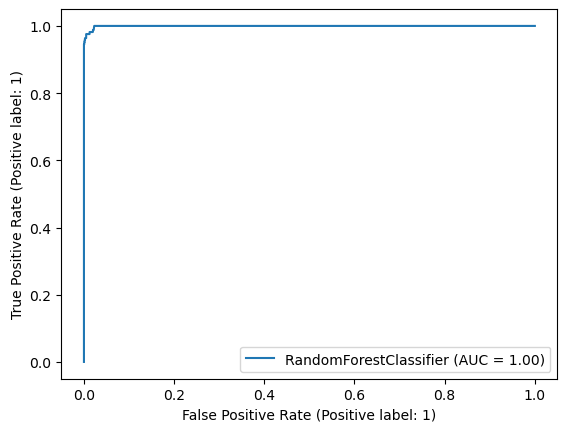

In [159]:
metrics.plot_roc_curve(rf, x_test, y_test)
print('roc_auc_score is: ', roc_auc_score(y_test, test_pred_rf))